In [1]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Fill in the missing code
The following script is an implementation of a logistic regression model for a binary classification problem. The dataset contains four numerical input attributes and one output attribute (class label 0 or 1).

- Columns **Attribute1**, **Attribute2**, **Attribute3**, and **Attribute4** are inputs.
- Column **OutputClass** is output.

The missing pieces of code are indicated like so: `#write your code here#`.

The functions corresponding to said missing code are stated in the description above each function.

To complete the task, replace `#write your code here#` with the your own code. Also, ensure that the program executes without any warnings or errors.

In [2]:
# Reading CSV file as pandas dataframe
data = pd.read_csv("Full_Data.csv")

data_X = data.values[:, :-1]
data_Y = data.values[:, -1].astype("int")

# Splitting dataset into training and test set
X_full, test_X_full, Y, test_Y = train_test_split(data_X, data_Y, test_size=0.4, shuffle=True, random_state=1)

In [3]:
data.head()

,RowIdx,Attribute1,Attribute2,Attribute3,Attribute4,OutputClass
0,1,19.29,31.50,0.0,428.50,0
1,2,20.39,30.20,0.0,726.00,0
2,3,19.52,27.36,392.5,486.75,0
3,4,21.00,24.89,0.0,445.50,0
4,5,20.60,22.13,0.0,445.75,0


In [4]:
data.describe()

,RowIdx,Attribute1,Attribute2,Attribute3,Attribute4,OutputClass
count,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000
mean,3084.500000,20.913525,27.712155,131.220000,692.671180,0.231031
std,1780.692562,1.055894,5.032648,209.164748,312.857386,0.421526
min,1.000000,19.000000,16.750000,0.000000,412.750000,0.000000
25%,1542.750000,20.200000,24.500000,0.000000,461.500000,0.000000
50%,3084.500000,20.700000,27.340000,0.000000,566.165000,0.000000
75%,4626.250000,21.600000,31.290000,307.542500,805.312500,0.000000
max,6168.000000,24.390000,39.500000,1697.250000,2076.500000,1.000000


Try out different input column indexes as input data. For instance, if you choose to use input columns 2 and 3; replace `#write your code here#` with `1, 2` (resp.) in the code block below.

Example:
* `attr1 = 1`
* `attr2 = 2`

Note column 1 (i.e., column index = 0) is `RowIdx`, and should not be used as an input.

Also note, *column index = column number - 1*.

In [5]:
# Removing all columns other than two
attr1 =0 #write your code here#
attr2 =3 #write your code here#
X = X_full[:, (attr1, attr2)]
test_X = test_X_full[:, (attr1, attr2)]

Text(0, 0.5, 'Attribute 2')

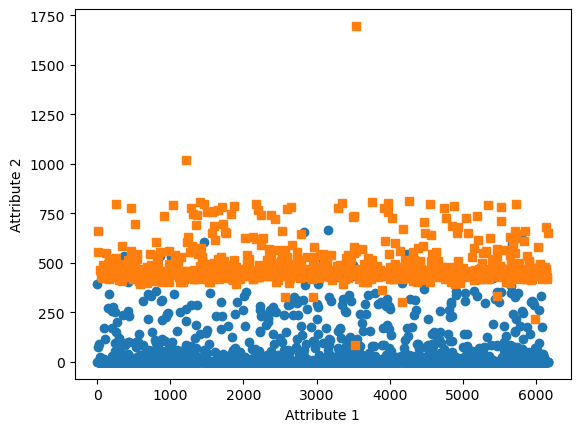

In [6]:
# Ploting attributes
plt.plot(X[:, 0][Y==0], X[:, 1][Y==0], "o")
plt.plot(X[:, 0][Y==1], X[:, 1][Y==1], "s")
plt.xlabel("Attribute 1")
plt.ylabel("Attribute 2")

The code block below constructs $\mathbf{X}$. Note that $\mathbf{X}$ includes $x_0 = 1$ column for the bias (i.e., intercept).

In [7]:
# Combining input data with fabricated output class
X = np.hstack((np.ones((X.shape[0], 1)), X))
print("The regenerated input data has class labels set to 1:\n", X)

The regenerated input data has class labels set to 1:
 [[1.0000e+00 5.7880e+03 4.6100e+02]
 [1.0000e+00 1.3390e+03 3.3500e+01]
 [1.0000e+00 5.8440e+03 4.5550e+02]
 ...
 [1.0000e+00 3.9810e+03 7.5825e+02]
 [1.0000e+00 2.3600e+02 2.3500e+01]
 [1.0000e+00 5.1580e+03 5.7425e+02]]


## Logistic Regression Model

For Logistic Regression, our hypothesis is 
$$
\hat{Y} = h_w(x) = \frac{1}{1+e^{-(w^{T}x)}}
$$
The output range of $\hat{Y}$ is between 0 and 1.

### Sigmoid Function

The Sigmoid function squishes all its inputs (i.e., values on x-axis) between 0 and 1.
$$
\sigma(z) = \frac{1}{1+e^{-z}}
$$

In [8]:
# Defining sigmoid function
def sigmoid(z):
    # z --> input
    # sigmoid_z --> output of sigmoid function
    z = z.astype(float)
    sigmoid_z =1 / (1 + np.exp(-z)) #write your code here#
    
    return sigmoid_z

The cost function for Logistic Regression for binary classification:
$$
J(data, w) = \frac{1}{n}\sum_{i=1}^{n} L(\hat{Y}^{(i)},Y^{(i)}) = -\frac{1}{n}\sum_{i=1}^{n} [Y^{(i)}log(\hat{Y}^{(i)}) + (1-Y^{(i)})log(1-\hat{Y}^{(i)})]
$$

This loss is also called binary cross entropy error.

In [9]:
# Defining loss function
def loss(Y, y_hat):
    # Y --> data
    # y_hat --> w
    loss =(Y * np.log(y_hat) + (1 - Y) * np.log(1 - y_hat)).mean() #write your code here#
    
    return -loss

### Gradient of the loss function

Using the Gradient Descent Algorithm, optimal values of the parameters can be calculated like so ($\eta$ →learning rate), the update rules for parameters are as follows:
$$
w_{t+1} = w_{t} - \eta*dw
$$
Where $dw$ is the partial derivative of loss w.r.t parameter $w$. It looks like:
$$
dw = \frac{1}{n} * (\hat{y}-y).\textbf{X}
$$

In [10]:
# Defining gradient function
def gradients(X, Y, y_hat):
    # X --> input
    # Y --> true/target value
    # y_hat --> hypothesis/predictions
    # n --> number of training examples
    
    n = X.shape[0]
    
    # Gradient of loss w.r.t weights
    dw =np.dot(X.T, (y_hat - Y)) / n #write your code here#
    
    return dw

Normalize the data before using/computing gradient. It can accelerate the training process. Make sure you don"t normalize the "bias" term (i.e., first column).

In [11]:
# Defining data normalization function
def normalize(X):
    # X --> input
    # n --> number of training examples
    # d --> number of features 
    n, d = X.shape
    
    # Normalizing all the d features of X (except the bias (first) column)
    for i in range(d-1):
        X[:,i+1] = (X[:,i+1] - X[:,i+1].mean(axis=0))/X[:,i+1].std(axis=0)
        
    return X

### Prediction

Now that the functions to learn the parameters are ready, check if the hypothesis ($\hat{Y}$) is able to predict the output class $Y=1$ or $Y=0$. Note that the hypothesis is the probability of $Y$ being 1 given $\textbf{X}$ and is parameterized by $w$.

Hence, the prediction function will be so —
$$
\hat{Y} = 1 \to w^{T}\textbf{X}
\geq 0
$$
$$
\hat{Y} = 0  \to w^{T}\textbf{X} < 0
$$

In [12]:
# Defining prediction function
def predict(X,w):
    # X --> Input.
    
    # Normalizing the inputs.
    X = normalize(X)
    
    # Calculating prediction/y_hat.
    preds = sigmoid(np.dot(X, w))
    
    # Empty List to store predictions.
    pred_class = []
    for pred in preds:
        if pred >= 0.6:
            pred_class.append(1)
        else:
            pred_class.append(0)
    
    return np.array(pred_class)
# Naveen

The decision boundary will be:
$$
\hat{Y} = 0.5 \quad or \quad w^{T}\textbf{X} = 0
$$

In [13]:
# Defining function to plot decision boundary
def plot_decision_boundary(X,w):
    ydisp = -(w[0] + w[1] * X)/w[2]
    
    fig = plt.figure(figsize=(10, 8))
    plt.plot(X[:, 1][Y==0], X[:, 2][Y==0], "^")
    plt.plot(X[:, 1][Y==1], X[:, 2][Y==1], "s")
    
    plt.xlim([-2, 5])
    plt.ylim([-2, 5])
    plt.xlabel("Attribute 1")
    plt.ylabel("Attribute 2")
    plt.title("Decision Boundary")
    plt.plot(X, ydisp)

Now that all the required blocks for logistic regression model are ready, encode the model.

In [14]:
# Defining training function
def train(X, Y, epochs, eta):
    # X --> input
    # Y --> true/target value
    # bs --> batch size
    # eta --> learning rate
    # n-> number of training examples
    # d-> number of features 
    
    n, d = X.shape
    
    # Initializing weights and bias to zeros
    w = np.zeros((d,1))
    
    # Reshaping Y
    Y = Y.reshape(n,1)
    
    # Normalizing the inputs
    X = normalize(X)
    
    # Empty list to store losses
    losses = []
    
    # Training loop
    for epoch in range(epochs):
        
            # Calculating hypothesis/prediction
            y_hat =sigmoid(np.dot(X, w)) #write your code here#
            
            # Getting the gradients of loss w.r.t parameters
            dw =gradients(X, Y, y_hat) #write your code here#
            
            # Updating the parameters.
            w = w- eta*dw
            
            # Calculating loss and appending it in the list
            l =loss(Y, y_hat) #write your code here#
            losses.append(l)
        
    # Returning weights, losses(List)
    return w, losses

Train the model and print the results.

Try out different learning rates to improve model performance.

Example: `w, l = train(X, Y, epochs=100, eta=0.001)`

In [15]:
# Training model 
w, l = train(X, Y, epochs=1000, eta=1)#write your code here#)

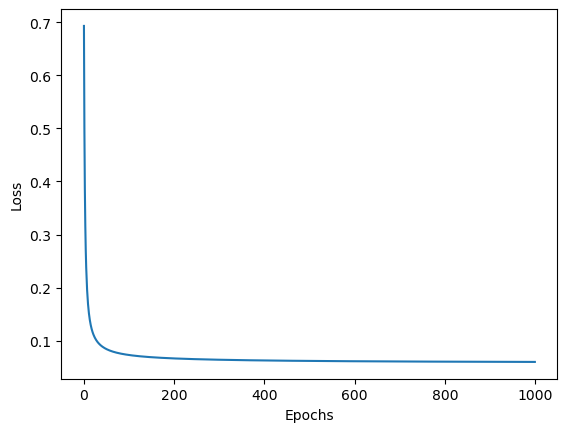

In [16]:
# Plotting loss vs. epoch function
plt.plot(l)
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()

In [17]:
# Printing training accuracy
print("The accuracy of model is",(np.sum(1*(Y==predict(X,w)))/len(Y))*100,"%")

The accuracy of model is 98.86486486486487 %


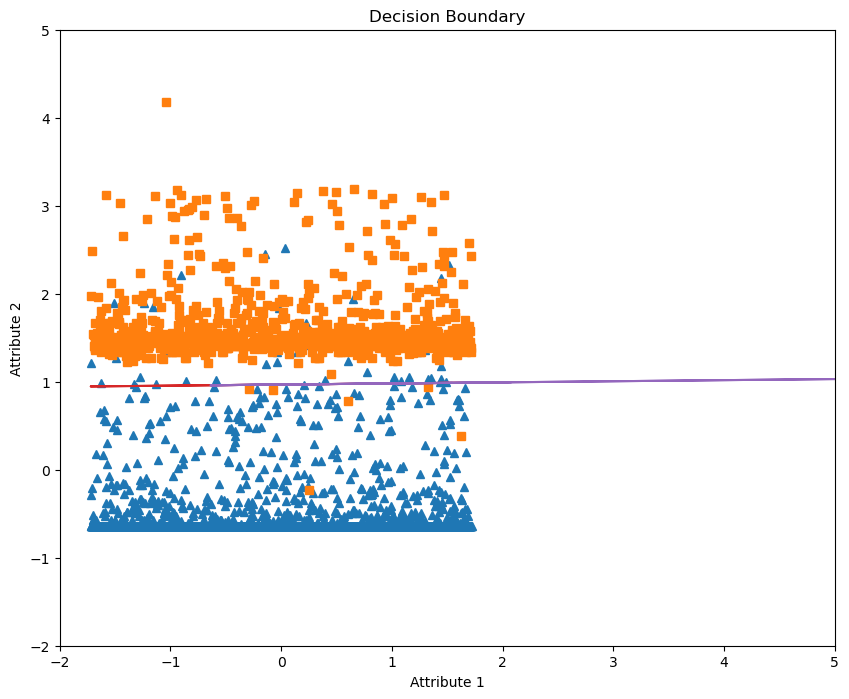

In [18]:
# Plotting the decision boundary
plot_decision_boundary(X, w)

Run the test data through the trained model, and print the testing accuracy.

In [19]:
# Checking test accuracy
test_X = np.hstack((np.ones((test_X.shape[0],1)), test_X))
ml_predictions = predict(test_X,w)
print("The test accuracy of model is",(np.sum(1*(test_Y==ml_predictions))/len(test_Y))*100,"%")

The test accuracy of model is 98.257698541329 %


In [20]:
# Exporting results
row_idx = np.concatenate((test_X_full[:, 0].astype(int), X_full[:, 0].astype(int)))
opt_cls = np.concatenate((ml_predictions.astype(int), Y.astype(int)))
                              
output_data = np.concatenate((row_idx.reshape(-1,1), opt_cls.reshape(-1,1)), axis=1)
pd.DataFrame(output_data, columns=["RowIdx", "OutputClass"]).to_csv("Output_Data.csv", index=False)